# Двойной математический маятник
**Работу выполнила:** Чеснокова Мария

В 2020 году в Мичиганском государственном университете были проведены три эксперимента с двойным физическим маятником. Результаты опубликованы в работе [Low-cost double pendulum for high-quality data collection with open-source video tracking and analysis](https://www.sciencedirect.com/science/article/pii/S246806722030047X) и на сегодняшний день являются одними из самых тщательно задокументированных экспериментов. Ниже представлен двойной маятник, участвовавший в эксперименте.

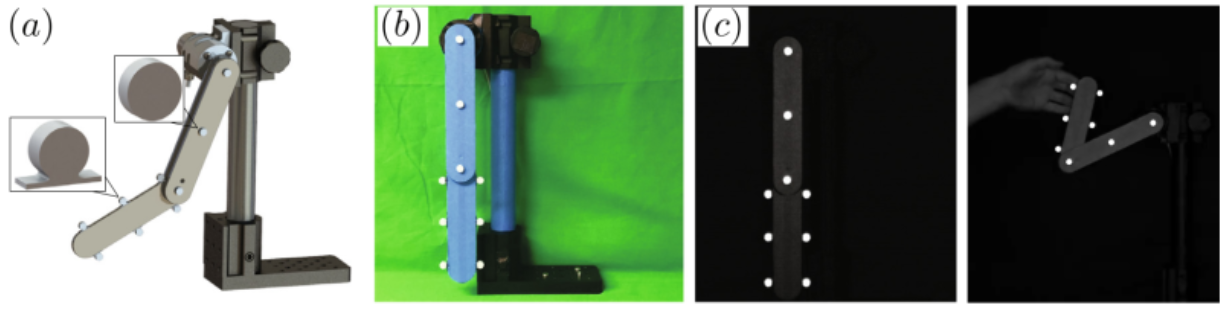

Собранные экспериментальные данные полностью открыты и доступны в материалах статьи. Значения углов определялись с помощью специально разработанного авторами алгоритма отслеживания девяти маркеров на маятнике. 

Авторами приводится упрощенная модель маятника, которая представлена ниже.

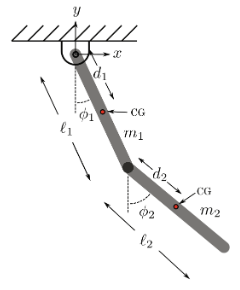

$$ m_1 = 0.311,
m_2 = 0.111,
d_1 = 0.079,
d_2 = 0.071,
l_1 = 0.172,
l_2 = 0.143
$$

## Постановка задачи
На основе второго закона Ньютона и с использованием нескольких циклов математического моделирования рассмотрите движение двойного физического маятника. Выполните анализ с использованием следующих моделей:

1. Используя упрощённую модель, представленную авторами, составьте систему дифференциальных уравнений для описания движения маятника с затуханием. На основе данных третьего эксперимента определите момент времени, когда маятник был отпущен для свободного движения, и сформулируйте начальные условия (значения углов и угловых скоростей). Определите, сколько секунд наблюдается высокая корреляция значений модели с данными эксперимента.

2. Используя экспериментальные данные из работы, скорректируйте модель так, чтобы повысить степень соответствия между расчётными и экспериментальными данными. Выполните графическое сравнение результатов и предоставьте анализ с применением методов описательной статистики. Например, можно использовать коэффициенты корреляции Пирсона, Спирмена, Кендалла, коэффициент детерминации  
$R^2$, RMSE, MAE и т.д. Обоснуйте выбор применённых методов.

3. Для описания полной динамики двойного маятника используются четыре переменные, что затрудняет её непосредственную визуализацию. Один из способов анализа такой системы — использование сечений Пуанкаре (например, Poincaré first-return map), которые позволяют отобразить четырёхмерные траектории в виде двумерного графика, показывающего точки пересечения траекторий с плоскостью Пуанкаре. Для скорректированной модели продемонстрируйте динамику двойного маятника с помощью сечений Пуанкаре. Теоретические определения и примеры приведены в работе Сечения Пуанкаре при описании поведения нелинейных систем.

## Решение
### Модель 1

Рассматривается плоский двойной маятник, состоящий из двух жёстких звеньев, соединённых шарнирами.
В рамках данной модели масса каждого звена считается сосредоточенной в его центре масс.
Сами звенья предполагаются безмассовыми и используются только для задания геометрии системы.

Массы звеньев равны $m_1$ и $m_2$.
Расстояния от точки подвеса до соответствующих центров масс равны $d_1$ и $d_2$.
Движение системы описывается обобщёнными координатами $\theta_1$ и $\theta_2$,
определяющими углы отклонения звеньев от вертикали. 

Тогда координаты центра масс первого звена имеют вид:
\begin{equation}
\begin{cases}
    x_1 = d_1 \sin(\theta_1), \\
    y_1 = -d_1 \cos(\theta_1). \\
\end{cases}
\end{equation}

Координаты центра масс второго звена:
\begin{equation}
\begin{cases}
    x_2 = l_1 \sin(\theta_1) + d_2 \sin(\theta_2), \\
    y_2 = -l_1 \cos(\theta_1) - d_2 \cos(\theta_2).
\end{cases}
\end{equation}

Скорость центра масс первого звена определяется как первая производная:
\begin{equation}
\begin{cases}
    \dot x_1 = d_1 \cos(\theta_1) \dot \theta_1, \\
    \dot y_1 = d_1 \sin(\theta_1) \dot \theta_1. \\
\end{cases}
\end{equation}

Скорость центра масс второго звена:
\begin{equation}
\begin{cases}
    \dot x_2 = l_1 \cos(\theta_1) \dot \theta_1 + d_2 \cos(\theta_2) \dot \theta_2, \\
    \dot y_2 = l_1 \sin(\theta_1) \dot \theta_1 + d_2 \sin(\theta_2) \dot \theta_2.
\end{cases}
\end{equation}

Составим Лагранжиан по следующей формуле:
$$L = K - U, $$
где $K$ - кинетическая энергия, а $U$ - потенциальная.

Кинетическая энергия каждого звена состоит из поступательной энергии движения центра масс:
\begin{equation}
K = \frac{m_1 v_1^2}{2} + \frac{m_2 v_2^2}{2}.
\end{equation}

Квадраты модулей скорости
\begin{equation}
\begin{cases}
    v_1^2 = \dot x_1^2 + \dot y_1^2 = (d_1 \cos(\theta_1) \dot \theta_1)^2 + (d_1 \sin(\theta_1) \dot \theta_1)^2 = d_1^2 \dot \theta_1^2, \\
    v_2^2 = \dot x_2^2 + \dot y_2^2 = (l_1 \cos(\theta_1) \dot \theta_1 + d_2 \cos(\theta_2) \dot \theta_2)^2 + (l_1 \sin(\theta_1) \dot \theta_1 + d_2 \sin(\theta_2)  \dot \theta_2)^2 = l_1^2 \dot \theta_1^2 + d_2^2  \dot \theta_2^2 + 2 l_1 d_2 \dot \theta_1 \dot \theta_2 \cos(\theta_2 - \theta_1).
\end{cases}
\end{equation}

Потенциальная энергия в поле силы тяжести равна:
\begin{equation}
U = m_1 g y_1 + m_2 g y_2.
\end{equation}

Лагранжиан системы:
$$
L = \frac{m_1 v_1^2 + m_2 v_2^2}{2} - g (m_1 y_1 + m_2 y_2).
$$

Уравнения движения:
\begin{equation}
\begin{cases}
     (m_1 d_1^2 + m_2 l_1^2 + I_1) \ddot \theta_1 + m_2 l_1 d_2 \cos(\theta_2 - \theta_1) \ddot \theta_2 = m_2 l_1 d_2 \dot \theta_1 \dot \theta_2 \sin(\theta_2 - \theta_1) - g (m_1 d_1 \sin(\theta_1) + m_2 l_1 \sin(\theta_1)) + m_2 l_1 d_2 \dot \theta_2 \sin(\theta_2 - \theta_1) (\dot \theta_2 - \dot \theta_1), \\ 
    m_2 l_1 d_2 \cos(\theta_2 - \theta_1) \ddot \theta_1 + (I_2 + m_2 d_2^2) \ddot \theta_2 = -m_2 l_1 d_2 \dot \theta_1 \dot \theta_2 \sin(\theta_2 - \theta_1) - g (m_2 d_2 \sin(\theta_2)) + m_2 l_1 d_2 \dot \theta_1 \sin(\theta_2 - \theta_1) (\dot \theta_2 - \dot \theta_1).
\end{cases}
\end{equation}

Полученная система уравнений движения имеет вид линейной системы относительно вторых производных обобщённых координат  
$\ddot{\theta}_1$ и $\ddot{\theta}_2$:

$$
\begin{pmatrix}
A_{11} & A_{12} \\
A_{12} & A_{22}
\end{pmatrix}
\begin{pmatrix}
\ddot{\theta}_1 \\
\ddot{\theta}_2
\end{pmatrix}
=
\begin{pmatrix}
F_1 \\
F_2
\end{pmatrix}.
$$

Элементы матрицы масс определяются как
$$
\begin{aligned}
A_{11} &= m_1 d_1^2 + m_2 l_1^2 + I_1, \\
A_{22} &= m_2 d_2^2 + I_2, \\
A_{12} &= m_2 l_1 d_2 \cos(\theta_2 - \theta_1).
\end{aligned}
$$

Правая часть системы имеет вид
$$
\begin{aligned}
F_1 &= m_2 l_1 d_2 \sin(\theta_2 - \theta_1)\,\dot{\theta}_2^2
- g\,(m_1 d_1 + m_2 l_1)\sin(\theta_1), \\
F_2 &= - m_2 l_1 d_2 \sin(\theta_2 - \theta_1)\,\dot{\theta}_1^2
- g\, m_2 d_2 \sin(\theta_2).
\end{aligned}
$$

Таким образом, вторые производные углов $\ddot{\theta}_1$ и $\ddot{\theta}_2$ на каждом шаге интегрирования определяются решением линейной системы.


#### Реализация 
 Определим класс с параметрами модели

In [115]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr

@dataclass
class Params:
    m1: float = 0.311
    m2: float = 0.111
    d1: float = 0.079
    d2: float = 0.071
    l1: float = 0.172
    l2: float = 0.143
    g: float = 9.81

    I1: float = None
    I2: float = None

    # вязкое затухание
    b1: float = 1e-3
    b2: float = 1e-3

    #  момент инерции материальной точки массы m, находящейся на расстоянии d от оси вращения
    def __post_init__(self):
        if self.I1 is None:
            self.I1 = self.m1 * self.d1**2
        if self.I2 is None:
            self.I2 = self.m2 * self.d2**2

Определим функции для загрузки данных эксперимента из csv-файлов.

In [116]:
# Загрузка данных
def load_arm_csv_deg(path):
    df = pd.read_csv(path, header=None)
    t = df.iloc[:, 0].to_numpy(float)
    ang_deg = df.iloc[:, 1].to_numpy(float)
    return t, ang_deg


def preprocess_angle_deg_to_rad_unwrap(ang_deg):
    # градусы -> рад
    a = np.deg2rad(ang_deg)
    # сначала в [-pi, pi]
    a_wrapped = (a + np.pi) % (2*np.pi) - np.pi
    # делаем непрерывный угол
    a_unwrapped = np.unwrap(a_wrapped)
    return a_unwrapped


def load_two_arms(csv_rb0, csv_rb1):
    t0, a0_deg = load_arm_csv_deg(csv_rb0)
    t1, a1_deg = load_arm_csv_deg(csv_rb1)

    # пересечение по времени
    t_min = max(t0.min(), t1.min())
    t_max = min(t0.max(), t1.max())
    dt = min(np.median(np.diff(t0)), np.median(np.diff(t1)))
    t = np.arange(t_min, t_max, dt)

    a0i_deg = np.interp(t, t0, a0_deg)
    a1i_deg = np.interp(t, t1, a1_deg)

    th1 = preprocess_angle_deg_to_rad_unwrap(a0i_deg)
    th2 = preprocess_angle_deg_to_rad_unwrap(a1i_deg)
    return t, th1, th2

Определим функцию, описывающую систему уравнений модели 1 и функцию для решения.

In [117]:
# Модель задачи
def rhs(t, y, p: Params):
    th1, w1, th2, w2 = y
    m1, m2 = p.m1, p.m2
    d1, d2 = p.d1, p.d2
    l1 = p.l1
    I1, I2 = p.I1, p.I2
    g = p.g

    # матрица масс
    A11 = m1*d1**2 + m2*l1**2 + I1
    A22 = m2*d2**2 + I2
    A12 = m2*l1*d2*np.cos(th2 - th1)

    A = np.array([[A11, A12],
                  [A12, A22]], dtype=float)

    # правая часть + демпфирование
    F1 = (m2*l1*d2*np.sin(th2 - th1)*(w2**2)
          - g*(m1*d1 + m2*l1)*np.sin(th1)
          - p.b1*w1)

    F2 = (-m2*l1*d2*np.sin(th2 - th1)*(w1**2)
          - g*m2*d2*np.sin(th2)
          - p.b2*w2)

    dd1, dd2 = np.linalg.solve(A, np.array([F1, F2], dtype=float))
    return [w1, dd1, w2, dd2]

def simulate(p: Params, t_eval, y0):
    sol = solve_ivp(
        fun=lambda tt, yy: rhs(tt, yy, p),
        t_span=(t_eval[0], t_eval[-1]),
        y0=y0,
        t_eval=t_eval,
        method="DOP853",
        rtol=1e-9,
        atol=1e-9
    )
    if not sol.success:
        raise RuntimeError(sol.message)
    return sol.y  # shape (4, N)

Определим функцию для нахождения момента отпускания маятника. 

Предполагается, что до отпускания маятник практически неподвижен, а в момент отпускания происходит резкий рост угловых скоростей. Именно этот скачок и используется как критерий.
Если резкий скачок скорости не обнаружен (например, при плавном отпускании), выбирается момент максимальной скорости, как наиболее вероятный момент начала свободного движения.

In [118]:
# Оценка момента отпускания по росту скорости
def estimate_release_by_speed(t, th1, th2, baseline_sec=5.0, k=8.0):
    dt = np.median(np.diff(t))
    w1 = np.gradient(th1, dt)
    w2 = np.gradient(th2, dt)
    s = np.sqrt(w1**2 + w2**2) # показывает, насколько активно движется система в целом

    n0 = max(10, int(baseline_sec/dt))
    base = s[:n0]
    mu, sig = np.mean(base), np.std(base) + 1e-12 # средний уровень шума скорости, стандартное отклонение (шум датчиков)

    idx = np.where(s > mu + k*sig)[0]
    if len(idx) == 0:
        return float(t[int(np.argmax(s))])
    return float(t[int(idx[0])])

Сделаем предсказания и подберём начальные параметры - начальные угловые скорости, коэффициенты вязкого затухания.

Подбирать будем методом наименьших квадратов.
Для начала определим момент отпускания маятника с помощью выше написаннной функции. Начнём исследовать поведение маятника именно с момента его отпускания.

In [133]:
# Фит затухания и начальных скоростей
def fit_after_release(t, th1, th2, p: Params,
                      t_release=None,
                      fit_seconds=20.0,
                      refine_initial_omegas=True):
    if t_release is None:
        t_release = estimate_release_by_speed(t, th1, th2) # момент отпускания маятника

    mask = (t >= t_release) & (t <= t_release + fit_seconds) # сдвиг по времени
    tt = t[mask] - t_release
    th1_fit = th1[mask]
    th2_fit = th2[mask]

    dt = np.median(np.diff(tt)) # медиана шага по времени
    w1_guess = float(np.gradient(th1_fit, dt)[0]) # угловая скорость 1
    w2_guess = float(np.gradient(th2_fit, dt)[0]) # угловая скорость 2

    th1_0 = float(th1_fit[0]) # начальный угол 1
    th2_0 = float(th2_fit[0]) # начальный угол 2

    # Параметры оптимизации: начальная скорость, коэффициенты вязкого трения
    # x = [w1_0, w2_0, log_b1, log_b2]
    
    if refine_initial_omegas: # подбираются все 4 параметра
        x0 = np.array([w1_guess, w2_guess, np.log(1e-3), np.log(1e-3)], float) # начальное приближение
        lb = np.array([-50.0, -50.0, np.log(1e-6), np.log(1e-6)], float) # нижние границы
        ub = np.array([ 50.0,  50.0, np.log(1.0),  np.log(1.0)], float) # верхние границы
    else: # подбираются только последние два
        x0 = np.array([np.log(1e-3), np.log(1e-3)], float) # начальное приближение
        lb = np.array([np.log(1e-6), np.log(1e-6)], float) # нижние границы
        ub = np.array([np.log(1.0),  np.log(1.0)], float) # верхние границы

    def residuals(x): # вектор параметров
        p_loc = Params(**p.__dict__)

        if refine_initial_omegas:
            w1_0 = float(x[0]); w2_0 = float(x[1])
            p_loc.b1 = float(np.exp(x[2]))
            p_loc.b2 = float(np.exp(x[3]))
        else:
            w1_0 = w1_guess; w2_0 = w2_guess
            p_loc.b1 = float(np.exp(x[0]))
            p_loc.b2 = float(np.exp(x[1]))

        y0 = [th1_0, w1_0, th2_0, w2_0] # начальные условия
        Y = simulate(p_loc, tt, y0) # решение ДУ

        # разность углов между моделью и экспериментом
        r1 = Y[0] - th1_fit
        r2 = Y[2] - th2_fit
        return np.concatenate([r1, r2])

    res = least_squares(residuals, #разность
                        x0, # начальное приближение
                        bounds=(lb, ub), # границы
                        method="trf", # Trust Region Reflective
                        loss="huber", # Huber-loss
                        f_scale=0.03, # порог всё, что больше — считается шумом измерений
                        max_nfev=300) # максимальное число вызовов функции

    # извлекаем лучшее
    p_best = Params(**p.__dict__)
    if refine_initial_omegas:
        w1_0 = float(res.x[0]); w2_0 = float(res.x[1])
        p_best.b1 = float(np.exp(res.x[2]))
        p_best.b2 = float(np.exp(res.x[3]))
    else:
        w1_0 = w1_guess; w2_0 = w2_guess
        p_best.b1 = float(np.exp(res.x[0]))
        p_best.b2 = float(np.exp(res.x[1]))

    return {
        "t_release_abs": float(t_release),
        "theta1_0": th1_0,
        "theta2_0": th2_0,
        "omega1_0": float(w1_0),
        "omega2_0": float(w2_0),
        "b1": float(p_best.b1),
        "b2": float(p_best.b2),
        "fit_cost": float(res.cost),
        "fit_status": int(res.status),
        "params": p_best
    }

Посчитаем корреляцию между смоделированным решением и экспериментальным

In [134]:
# Корреляция
def rolling_corr_safe(a, b, win):
    out = np.zeros_like(a, dtype=float) 
    half = win // 2
    for i in range(half, len(a) - half):
        aa = a[i-half:i+half+1]
        bb = b[i-half:i+half+1]
        sa = np.std(aa); sb = np.std(bb)
        if sa < 1e-10 or sb < 1e-10:
            out[i] = 0.0
        else:
            out[i] = np.corrcoef(aa, bb)[0, 1]
    return out


def corr_duration_only(t, th1_d, th2_d, th1_m, th2_m, threshold=0.9, win_sec=1.0):
    dt = np.median(np.diff(t))
    win = max(11, int(win_sec/dt))
    if win % 2 == 0:
        win += 1

    c1 = rolling_corr_safe(th1_m, th1_d, win)
    c2 = rolling_corr_safe(th2_m, th2_d, win)
    cmin = np.minimum(c1, c2)

    start = win // 2
    k = start
    while k < len(cmin) and cmin[k] >= threshold:
        k += 1
    return float(t[k-1] if k > start else 0.0)

Выведем полученные результаты

In [135]:
csv0 = "DPmean_data_RB0.csv"  # плечо 1
csv1 = "DPmean_data_RB1.csv"  # плечо 2

t, th1, th2 = load_two_arms(csv0, csv1)
p = Params()

# Находим момент отпускания + фитим b1,b2
fit = fit_after_release(
    t, th1, th2, p,
    t_release=None,
    fit_seconds=10.0,
    refine_initial_omegas=True
)

print("\n=== RELEASE & IC ===")
print("t_release (abs, s):", fit["t_release_abs"])
print("theta1_0 (rad):", fit["theta1_0"])
print("theta2_0 (rad):", fit["theta2_0"])
print("omega1_0 (rad/s):", fit["omega1_0"])
print("omega2_0 (rad/s):", fit["omega2_0"])

print("\n=== DAMPING (fitted) ===")
print("b1:", fit["b1"])
print("b2:", fit["b2"])

# Моделируем на всём интервале после отпускания
t_rel = fit["t_release_abs"]
mask_all = t >= t_rel
t_all = t[mask_all] - t_rel
th1_all = th1[mask_all]
th2_all = th2[mask_all]

y0 = [fit["theta1_0"], fit["omega1_0"], fit["theta2_0"], fit["omega2_0"]]
Y = simulate(fit["params"], t_all, y0)
th1_m, th2_m = Y[0], Y[2]

# Считаем длительность высокой корреляции
duration = corr_duration_only(
    t_all, th1_all, th2_all, th1_m, th2_m,
    threshold=0.9, win_sec=1.0
)

print("\n=== CORRELATION ===")
print("High-corr duration (s):", duration)


=== RELEASE & IC ===
t_release (abs, s): 5.136000000000005
theta1_0 (rad): -3.3590447186318446
theta2_0 (rad): -5.088257242892562
omega1_0 (rad/s): -3.69609908124302
omega2_0 (rad/s): -17.55934390311415

=== DAMPING (fitted) ===
b1: 2.8346228270900398e-05
b2: 0.00027177682806631213

=== CORRELATION ===
High-corr duration (s): 1.2500000000000009


Определим функцию для вычисления статистических метрик и выведем графики экспериментального и смоделированного решения.

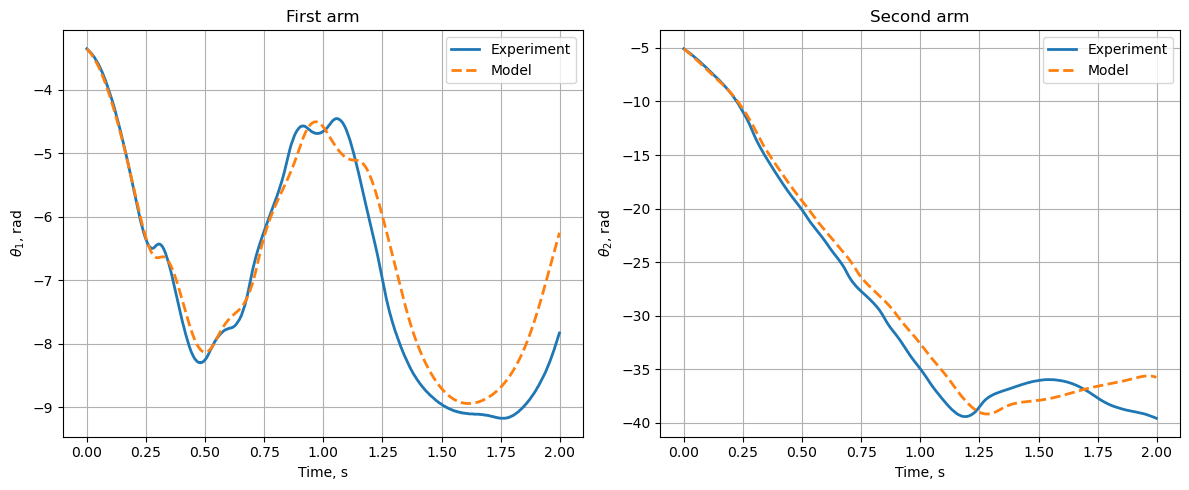


=== ERROR METRICS ===
             RMSE        MAE        R2   Pearson  Spearman
theta1   0.854097   0.527248 -0.470471  0.036839 -0.135407
theta2  18.960714  11.250574 -0.000103  0.466214  0.271992


In [148]:
def compute_error_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # корреляции
    pearson = pearsonr(y_true, y_pred)[0]
    spearman = spearmanr(y_true, y_pred)[0]

    return {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Pearson": pearson,
        "Spearman": spearman
    }

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_all[0:1000], th1_all[0:1000], label="Experiment", linewidth=2)
plt.plot(t_all[0:1000], th1_m[0:1000], "--", label="Model", linewidth=2)
plt.xlabel("Time, s")
plt.ylabel(r"$\theta_1$, rad")
plt.title("First arm")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_all[0:1000], th2_all[0:1000], label="Experiment", linewidth=2)
plt.plot(t_all[0:1000], th2_m[0:1000], "--", label="Model", linewidth=2)
plt.xlabel("Time, s")
plt.ylabel(r"$\theta_2$, rad")
plt.title("Second arm")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

metrics_1 = compute_error_metrics(th1_all, th1_m)
metrics_2 = compute_error_metrics(th2_all, th2_m)

df_metrics = pd.DataFrame([metrics_1, metrics_2],
                          index=["theta1", "theta2"])

print("\n=== ERROR METRICS ===")
print(df_metrics)


In [155]:
def poincare_section(theta1, omega1, theta2, omega2, theta1_ref):
    pts_th2 = []
    pts_w2 = []

    for i in range(1, len(theta1)):
        # когда угол первого маятника проходит через заданное значение
        if theta1[i-1] < theta1_ref and theta1[i] >= theta1_ref:
            # смотрим только одно направление - движение вперёд
            if omega1[i] > 0:
                pts_th2.append(theta2[i])
                pts_w2.append(omega2[i])

    return np.array(pts_th2), np.array(pts_w2)

In [156]:
theta1 = Y[0]
omega1 = Y[1]
theta2 = Y[2]
omega2 = Y[3]

theta1_ref = np.mean(theta1)

th2_p, w2_p = poincare_section(
    theta1, omega1,
    theta2, omega2,
    theta1_ref
)

print("Number of Poincaré points:", len(th2_p))


Number of Poincaré points: 77


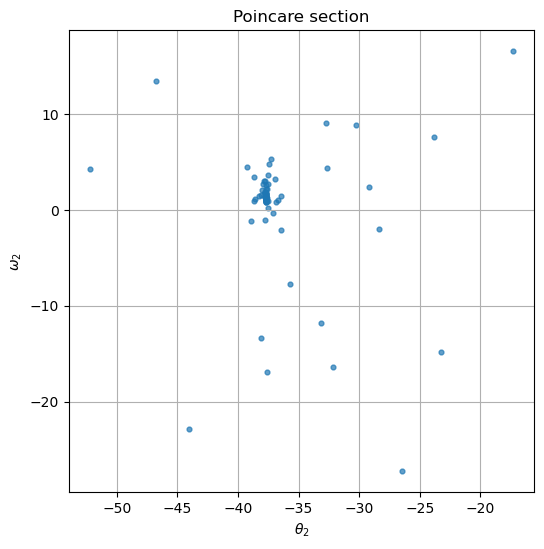

In [158]:
plt.figure(figsize=(6, 6))
plt.scatter(th2_p, w2_p, s=12, alpha=0.7)
plt.xlabel(r"$\theta_2$")
plt.ylabel(r"$\omega_2$")
plt.title(r"Poincare section")
plt.grid(True)
plt.show()


### Модель 2

Аналогично модели 1, но изменён расчёт момента инерции, поскольку центр масс находится не в геометрическим центре звена.

Момент инерции: $$I(m, d, l) = \int_0^l {p(x - d)^2 dx} = \frac{m}{3} (3 d^2 - 3 d l + l^2).$$

Для первого звена: $$I_1 = I(m_1, d_1, l_1).$$

Для второго звена: $$I_2 = I(m_2, d_2, l_2).$$

Уравнения движения:
\begin{equation}
\begin{cases}
     (m_1 d_1^2 + m_2 l_1^2 + I_1) \ddot \theta_1 + m_2 l_1 d_2 \cos(\theta_2 - \theta_1) \ddot \theta_2 = m_2 l_1 d_2 \dot \theta_1 \dot \theta_2 \sin(\theta_2 - \theta_1) - g (m_1 d_1 \sin(\theta_1) + m_2 l_1 \sin(\theta_1)) + m_2 l_1 d_2 \dot \theta_2 \sin(\theta_2 - \theta_1) (\dot \theta_2 - \dot \theta_1), \\ 
    m_2 l_1 d_2 \cos(\theta_2 - \theta_1) \ddot \theta_1 + (I_2 + m_2 d_2^2) \ddot \theta_2 = -m_2 l_1 d_2 \dot \theta_1 \dot \theta_2 \sin(\theta_2 - \theta_1) - g (m_2 d_2 \sin(\theta_2)) + m_2 l_1 d_2 \dot \theta_1 \sin(\theta_2 - \theta_1) (\dot \theta_2 - \dot \theta_1).
\end{cases}
\end{equation}

In [159]:
def inertia(m, d, l):
    return m / 3 * (3*d**2 - 3*d*l + l**2)

def rhs_model2(t, Y, p):
    theta1, omega1, theta2, omega2 = Y
    delta = theta2 - theta1

    I1 = inertia(p.m1, p.d1, p.l1)
    I2 = inertia(p.m2, p.d2, p.l2)

    A = p.m1*p.d1**2 + p.m2*p.l1**2 + I1
    B = p.m2*p.l1*p.d2*np.cos(delta)
    C = I2 + p.m2*p.d2**2

    F1 = (
        p.m2*p.l1*p.d2*omega1*omega2*np.sin(delta)
        - p.g*(p.m1*p.d1 + p.m2*p.l1)*np.sin(theta1)
        + p.m2*p.l1*p.d2*omega2*np.sin(delta)*(omega2 - omega1)
        - p.b1*omega1
    )

    F2 = (
        -p.m2*p.l1*p.d2*omega1*omega2*np.sin(delta)
        - p.g*p.m2*p.d2*np.sin(theta2)
        + p.m2*p.l1*p.d2*omega1*np.sin(delta)*(omega2 - omega1)
        - p.b2*omega2
    )

    det = A*C - B**2

    ddtheta1 = ( C*F1 - B*F2 ) / det
    ddtheta2 = ( A*F2 - B*F1 ) / det

    return [omega1, ddtheta1, omega2, ddtheta2]

def simulate_model2(p, t, y0):
    sol = solve_ivp(
        fun=lambda tt, yy: rhs_model2(tt, yy, p),
        t_span=(t[0], t[-1]),
        y0=y0,
        t_eval=t,
        rtol=1e-8,
        atol=1e-8
    )
    return sol.y

In [160]:
fit = fit_after_release(
    t, th1, th2, p,
    t_release=None,
    fit_seconds=10.0,
    refine_initial_omegas=True
)

print("\n=== RELEASE & IC ===")
print("t_release (abs, s):", fit["t_release_abs"])
print("theta1_0 (rad):", fit["theta1_0"])
print("theta2_0 (rad):", fit["theta2_0"])
print("omega1_0 (rad/s):", fit["omega1_0"])
print("omega2_0 (rad/s):", fit["omega2_0"])

print("\n=== DAMPING (fitted) ===")
print("b1:", fit["b1"])
print("b2:", fit["b2"])

# Моделируем на всём интервале после отпускания
t_rel = fit["t_release_abs"]
mask_all = t >= t_rel
t_all = t[mask_all] - t_rel
th1_all = th1[mask_all]
th2_all = th2[mask_all]

y0 = [fit["theta1_0"], fit["omega1_0"], fit["theta2_0"], fit["omega2_0"]]
Y = simulate_model2(fit["params"], t_all, y0)
th1_m, th2_m = Y[0], Y[2]

# Считаем длительность высокой корреляции
duration = corr_duration_only(
    t_all, th1_all, th2_all, th1_m, th2_m,
    threshold=0.9, win_sec=1.0
)

print("\n=== CORRELATION ===")
print("High-corr duration (s):", duration)


=== RELEASE & IC ===
t_release (abs, s): 5.136000000000005
theta1_0 (rad): -3.3590447186318446
theta2_0 (rad): -5.088257242892562
omega1_0 (rad/s): -3.69609908124302
omega2_0 (rad/s): -17.55934390311415

=== DAMPING (fitted) ===
b1: 2.8346228270900398e-05
b2: 0.00027177682806631213

=== CORRELATION ===
High-corr duration (s): 1.0060000000000011


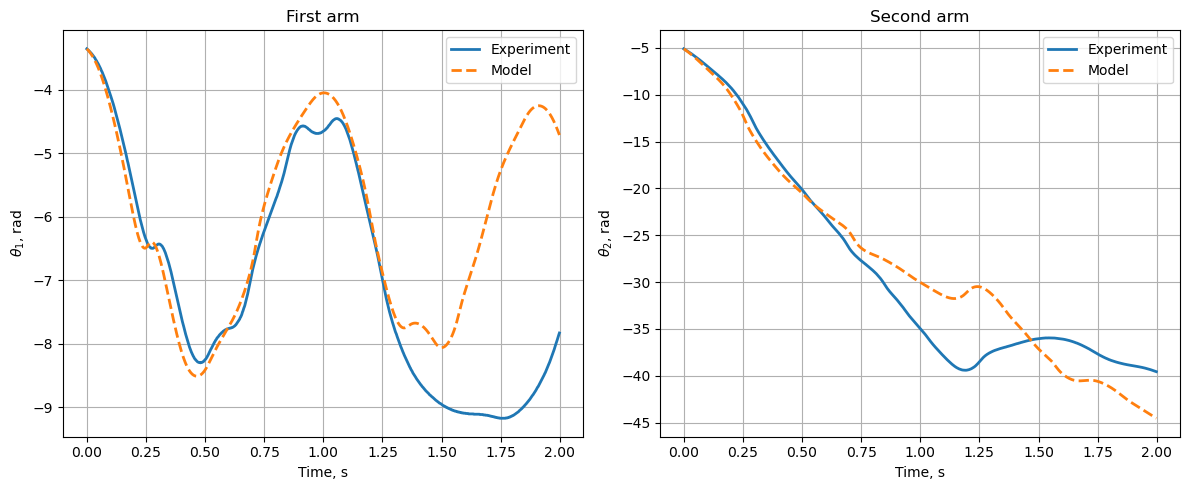


=== ERROR METRICS ===
             RMSE        MAE        R2   Pearson  Spearman
theta1   0.817531   0.475478 -0.347256  0.022252  0.028729
theta2  33.529683  28.705864 -2.127478 -0.293262 -0.179869


In [161]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_all[0:1000], th1_all[0:1000], label="Experiment", linewidth=2)
plt.plot(t_all[0:1000], th1_m[0:1000], "--", label="Model", linewidth=2)
plt.xlabel("Time, s")
plt.ylabel(r"$\theta_1$, rad")
plt.title("First arm")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_all[0:1000], th2_all[0:1000], label="Experiment", linewidth=2)
plt.plot(t_all[0:1000], th2_m[0:1000], "--", label="Model", linewidth=2)
plt.xlabel("Time, s")
plt.ylabel(r"$\theta_2$, rad")
plt.title("Second arm")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

metrics_1 = compute_error_metrics(th1_all, th1_m)
metrics_2 = compute_error_metrics(th2_all, th2_m)

df_metrics = pd.DataFrame([metrics_1, metrics_2],
                          index=["theta1", "theta2"])

print("\n=== ERROR METRICS ===")
print(df_metrics)

In [162]:
theta1 = Y[0]
omega1 = Y[1]
theta2 = Y[2]
omega2 = Y[3]

theta1_ref = np.mean(theta1)

th2_p, w2_p = poincare_section(
    theta1, omega1,
    theta2, omega2,
    theta1_ref
)

print("Number of Poincaré points:", len(th2_p))


Number of Poincaré points: 89


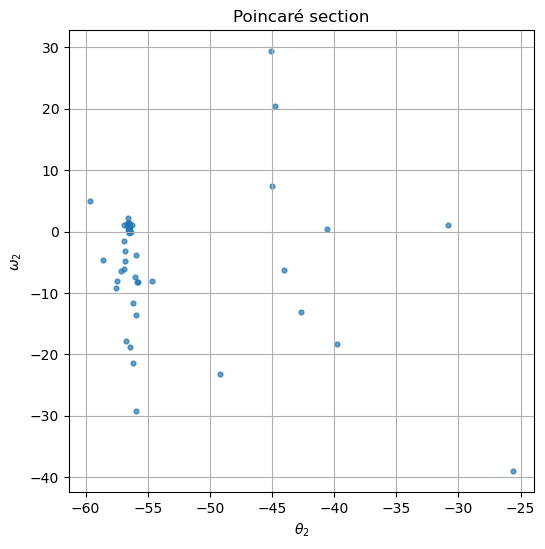

In [164]:
plt.figure(figsize=(6, 6))
plt.scatter(th2_p, w2_p, s=12, alpha=0.7)
plt.xlabel(r"$\theta_2$")
plt.ylabel(r"$\omega_2$")
plt.title(r"Poincaré section")
plt.grid(True)
plt.show()


# Выводы
В работе были рассмотрены две модели двойного маятника, различающиеся допущениями о распределении массы звеньев.
В первой модели массы звеньев представлены материальными точками, а собственное вращение стержней не учитывается.
Во второй модели масса звеньев считается распределённой вдоль их длины, это требует учёта собственного момента инерции каждого звена относительно оси вращения.

Сравнение результатов моделирования показывает, что учёт распределения массы приводит к изменению динамики системы: изменяются собственные частоты колебаний, фазовые траектории и характер хаотического поведения.
Таким образом, вторая модель является более физически реалистичной.

# Список используемой литературы
1. A comprehensive experimental dataset for the double pendulum / Hardwick, L.E., Cleaver, L., Moore, K.L., et al. Scientific Data. 2020. Vol. 7, Article 384. DOI: 10.1038/s41597-020-00676-w. URL: https://www.sciencedirect.com/science/article/pii/S246806722030047X
 (дата обращения: 20.12.2025).

2. The ups and downs of the compound double pendulum / The Galileo Project. URL: https://galileo-unbound.blog/2020/10/18/the-ups-and-downs-of-the-compound-double-pendulum/
 (дата обращения: 20.12.2025).

3. Сечения Пуанкаре при описании поведения нелинейных систем / (монография / статья / учебное пособие — уточни, если есть автор и год). URL: (укажи точный источник, если это электронный ресурс). (дата обращения: 20.12.2025).